# Effect of the Sample Size in Cross-Validation

It is also important to understand how the different errors are influenced by the number of samples variable. In this notebook, we will show this aspect by looking at the variability of the different errors.

Let's first make some imports and load the data and create the same model as in the previous notebook.

In [4]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve, ShuffleSplit

# Disable jedi autocompleter
%config Completer.use_jedi = False

In [5]:
housing = fetch_california_housing(as_frame=True)
data = housing.data
target = housing.target * 100 # rescale the target in k$

In [6]:
regressor = DecisionTreeRegressor()

## Learning Curve

To understand the impact of the number of samples available for training on the generalization performance of a predictive model, it is possible to synthetically reduce the number of samples used to train the predictive model and check the training and testing errors.  

Therefore, we can vary the number of samples in the training set and repeat the experiment. The training and testing scores can be plotted similarly to the validation curve, but instead of varying a hyperparameter, we vary the number of training samples. This curve is called the **learning curve**.

It gives information regarding the benefit of adding new training samples to improve a model's generalization performance.  

Let's compute the learning curve for a decision tree and vary the proportion of the training set from 10\% to 100\%.

In [7]:
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

We will use a `ShuffleSplit` cross-validation to assess our predictive model.

In [8]:
cv = ShuffleSplit(n_splits=30, test_size=.2)

Now, we are all set to carry out the experiment.

In [10]:
results = learning_curve(regressor, data, target, train_sizes=train_sizes, 
                         cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_size, train_scores, test_scores = results[:3]

# convert the scores into errors
train_errors = -train_scores
test_errors = -test_scores

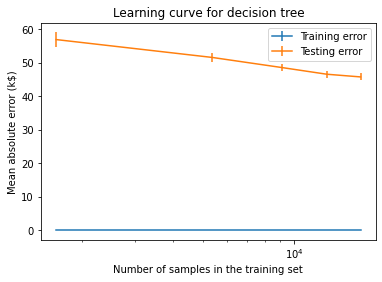

In [11]:
# Let's plot the results
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing error")
plt.legend()

plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
plt.title("Learning curve for decision tree");

Looking at the training error alone, we see that we get an error of 0 k\\$. It means that the trained model is clearly overfitting the training data.

Looking at the testing error alone, we observe that the more samples are added into the training set, the lower the testing error becomes. Also, we are searching for the plateau of the testing error for which there is no benefit to adding samples anymore or assessing the potential gain of adding more samples into the training set.

If we achieve a plateau and adding new samples in the training set does not reduce the testing error, we might have reach the Bayes error rate using the available model. Using a more complex model might be the only possibility to reduce the testing error further.